In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Assignment

For this assignment, you'll use a real-life dataset of housing prices, as published in the Journal of Applied EconometricsL http://qed.econ.queensu.ca/jae/1996-v11.6/anglin-gencay/. 
Download the data here: https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv.

Explore the following questions. Include a hypothesis, test assumptions, and provide valid findings from the data.

1. Do homes with air conditioning have a higher sales price than homes without air conditioning?
* Do homes with a full basement have a higher sales price than homes without a full basement?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences that you find.

When you are finished, compare your Notebook to this https://colab.research.google.com/drive/1IDnrmj41g_oXGStAYVZ9qhKijC-7_3CX.

In [2]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
houses = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv"
)
houses.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


<IPython.core.display.Javascript object>

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


<IPython.core.display.Javascript object>

In [5]:
houses.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


<IPython.core.display.Javascript object>

### 1. Do homes with air conditioning have a higher sales price than homes without air conditioning?

In [6]:
houses["airco"].value_counts()

no     373
yes    173
Name: airco, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
ac_yes = houses[houses["airco"] == "yes"]
ac_yes.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
373,66000.0,4160,3,1,1,yes,yes,yes,no,yes,0,no
374,90000.0,7200,3,2,1,yes,no,yes,no,yes,3,no
375,48500.0,4785,3,1,2,yes,yes,yes,no,yes,1,no
376,44000.0,4960,2,1,1,yes,no,yes,no,yes,0,no
377,70000.0,4520,3,1,2,yes,no,yes,no,yes,0,no


<IPython.core.display.Javascript object>

In [8]:
ac_no = houses[houses["airco"] == "no"]
ac_no.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(*args, **kw)>

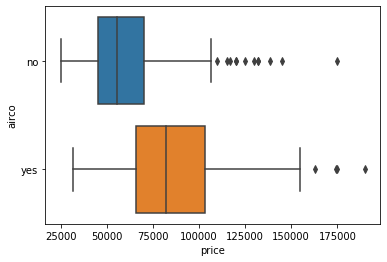

<IPython.core.display.Javascript object>

In [9]:
sns.boxplot(x="price", y="airco", data=houses)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

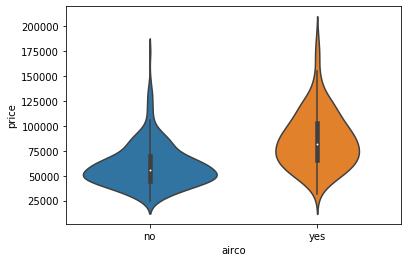

<IPython.core.display.Javascript object>

In [10]:
sns.violinplot(x="airco", y="price", data=houses)
plt.show

In [11]:
ac_yes.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,85880.589595,5855.635838,3.138728,1.421965,2.184971,0.890173
std,28463.438869,1973.752600,0.640995,0.550879,1.078546,0.911532
min,31900.000000,2175.000000,2.000000,1.000000,1.000000,0.000000
25%,66000.000000,4510.000000,3.000000,1.000000,1.000000,0.000000
50%,82000.000000,6000.000000,3.000000,1.000000,2.000000,1.000000
75%,103000.000000,6600.000000,3.000000,2.000000,3.000000,2.000000
max,190000.000000,15600.000000,5.000000,4.000000,4.000000,3.000000


<IPython.core.display.Javascript object>

In [12]:
stats.describe(ac_yes["price"])

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)

<IPython.core.display.Javascript object>

In [13]:
ac_no.describe()
stats.describe(ac_no["price"])

DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)

<IPython.core.display.Javascript object>

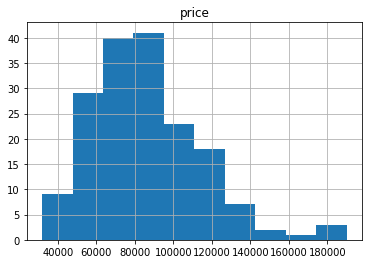

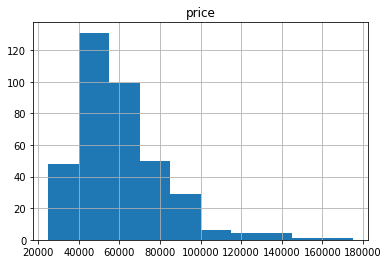

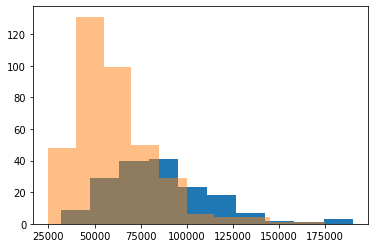

<IPython.core.display.Javascript object>

In [14]:
ac_yes.hist("price")
plt.show()

ac_no.hist("price")
plt.show()

plt.hist(ac_yes["price"])
plt.hist(ac_no["price"], alpha=0.5)
plt.show()

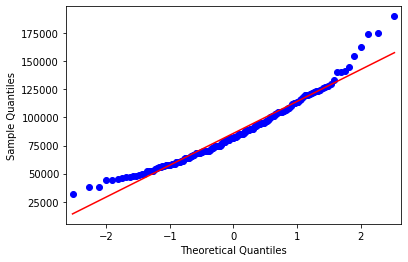

<IPython.core.display.Javascript object>

In [15]:
# quantile-quantile plot
sm.qqplot(ac_yes["price"], line="s")
plt.show()

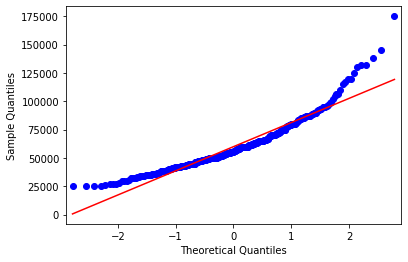

<IPython.core.display.Javascript object>

In [16]:
sm.qqplot(ac_no["price"], line="s")
plt.show()

In [17]:
t, p = stats.ttest_ind(ac_yes["price"], ac_no["price"])

<IPython.core.display.Javascript object>

In [18]:
t

11.862852780650169

<IPython.core.display.Javascript object>

In [19]:
p

4.972721571759431e-29

<IPython.core.display.Javascript object>

In [20]:
p < 0.05

True

<IPython.core.display.Javascript object>

Based on the data, there is a statistical significant difference between homes with
AC and homes without AC. Homes with AC have a significantly higher home price.

Confidence Interval

In [21]:
def calc_95_ci(x1, x2):
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.std() ** 2 / x1.size + x2.std() ** 2 / x2.size)

    ci_low = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return (ci_low, ci_hi)

<IPython.core.display.Javascript object>

In [23]:
calc_95_ci(ac_yes["price"], ac_no["price"])

(21233.379166974857, 30758.09492994282)

<IPython.core.display.Javascript object>

### 2. Do homes with a full basement have a higher sales price than homes without a full basement?

<function matplotlib.pyplot.show(*args, **kw)>

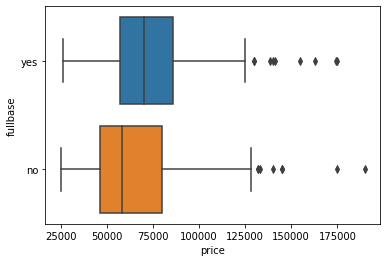

<IPython.core.display.Javascript object>

In [24]:
sns.boxplot(x="price", y="fullbase", data=houses)
plt.show

In [25]:
base_yes = houses[houses["fullbase"] == "yes"]
base_no = houses[houses["fullbase"] == "no"]

<IPython.core.display.Javascript object>

In [26]:
base_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     191 non-null    float64
 1   lotsize   191 non-null    int64  
 2   bedrooms  191 non-null    int64  
 3   bathrms   191 non-null    int64  
 4   stories   191 non-null    int64  
 5   driveway  191 non-null    object 
 6   recroom   191 non-null    object 
 7   fullbase  191 non-null    object 
 8   gashw     191 non-null    object 
 9   airco     191 non-null    object 
 10  garagepl  191 non-null    int64  
 11  prefarea  191 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB


<IPython.core.display.Javascript object>

In [27]:
base_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     355 non-null    float64
 1   lotsize   355 non-null    int64  
 2   bedrooms  355 non-null    int64  
 3   bathrms   355 non-null    int64  
 4   stories   355 non-null    int64  
 5   driveway  355 non-null    object 
 6   recroom   355 non-null    object 
 7   fullbase  355 non-null    object 
 8   gashw     355 non-null    object 
 9   airco     355 non-null    object 
 10  garagepl  355 non-null    int64  
 11  prefarea  355 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 36.1+ KB


<IPython.core.display.Javascript object>

In [28]:
base_yes.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,74894.502618,5290.502618,3.062827,1.356021,1.602094,0.753927
std,26219.907235,2174.125164,0.692995,0.532079,0.623062,0.892762
min,26000.000000,1650.000000,2.000000,1.000000,1.000000,0.000000
25%,57125.000000,3585.000000,3.000000,1.000000,1.000000,0.000000
50%,70000.000000,4960.000000,3.000000,1.000000,2.000000,0.000000
75%,86000.000000,6600.000000,3.000000,2.000000,2.000000,2.000000
max,175000.000000,13200.000000,5.000000,3.000000,4.000000,3.000000


<IPython.core.display.Javascript object>

In [29]:
base_no.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,355.000000,355.000000,355.000000,355.000000,355.00000,355.000000
mean,64477.583099,5074.814085,2.912676,1.247887,1.91831,0.659155
std,26281.039062,2164.247276,0.755942,0.481834,0.95762,0.843315
min,25000.000000,1700.000000,1.000000,1.000000,1.00000,0.000000
25%,46250.000000,3600.000000,2.000000,1.000000,1.00000,0.000000
50%,58500.000000,4500.000000,3.000000,1.000000,2.00000,0.000000
75%,79750.000000,6000.000000,3.000000,1.000000,2.00000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.00000,3.000000


<IPython.core.display.Javascript object>

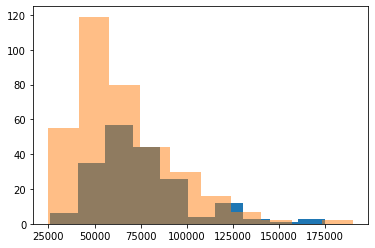

<IPython.core.display.Javascript object>

In [30]:
plt.hist(base_yes["price"])
plt.hist(base_no["price"], alpha=0.5)
plt.show()

In [31]:
stats.describe(base_yes["price"])

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)

<IPython.core.display.Javascript object>

In [32]:
stats.describe(base_no["price"])

DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)

<IPython.core.display.Javascript object>

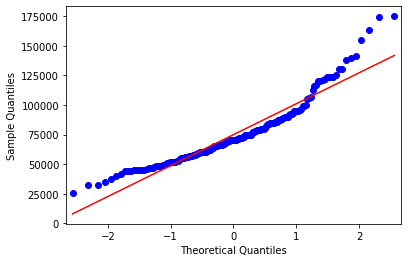

<IPython.core.display.Javascript object>

In [33]:
sm.qqplot(base_yes["price"], line="s")
plt.show()

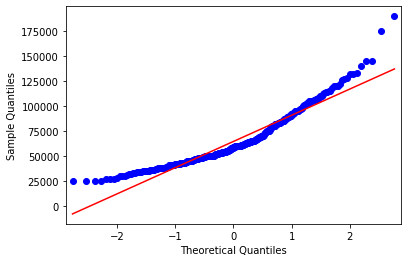

<IPython.core.display.Javascript object>

In [34]:
sm.qqplot(base_no["price"], line="s")
plt.show()

In [35]:
t, p = stats.ttest_ind(base_yes["price"], base_no["price"])

<IPython.core.display.Javascript object>

In [36]:
t

4.420628512286621

<IPython.core.display.Javascript object>

In [37]:
p

1.1885626562866786e-05

<IPython.core.display.Javascript object>

In [38]:
p < 0.05

True

<IPython.core.display.Javascript object>

In [39]:
calc_95_ci(base_yes["price"], base_no["price"])

(5801.544262762097, 15032.294775656886)

<IPython.core.display.Javascript object>

Based on the data, there is a small significant difference between homes with
a basement and homes without a basement.  Homes with a basement have a slightly higher home price.